# Rent Prediction

This project is to predict the rent of the house
Algorithms Used : 
1. Simple Linear Regression
2. Gradient Decent(Batch, Stochastic and Mini-batch mode)
3. Ridge
4. Lasso
5. Huber Regression

## Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor

In [3]:
rent_df=pd.read_csv('../../data/rentals.csv')

In [4]:
rent_df.head()

,area,bedrooms,furnished,rent
0,650,2,1,33000
1,750,3,0,55000
2,247,1,0,10500
3,1256,4,0,65000
4,900,3,0,37000


## Examine and visualize the data

In [5]:
rent_df.corr().T

,area,bedrooms,furnished,rent
area,1.000000,0.909483,0.005468,0.928966
bedrooms,0.909483,1.000000,0.030308,0.897170
furnished,0.005468,0.030308,1.000000,0.045185
rent,0.928966,0.897170,0.045185,1.000000


In [6]:
rent_df.describe()

,area,bedrooms,furnished,rent
count,500.000000,500.000000,500.000000,500.000000
mean,797.236000,2.524000,0.334000,38615.200000
std,469.241656,0.989638,0.701018,19717.969612
min,212.000000,1.000000,0.000000,9000.000000
25%,400.000000,2.000000,0.000000,20800.000000
50%,691.000000,2.000000,0.000000,35000.000000
75%,1052.500000,3.000000,0.000000,50000.000000
max,1970.000000,4.000000,2.000000,95000.000000


<AxesSubplot:>

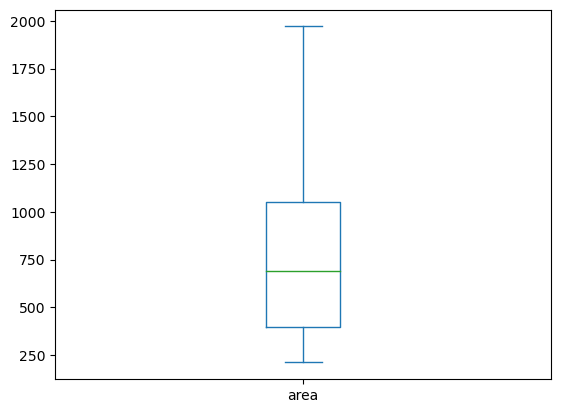

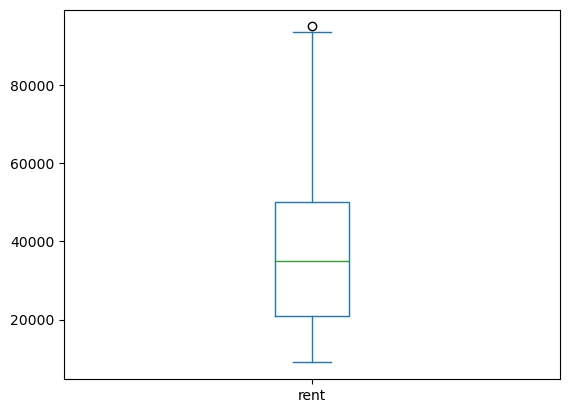

In [7]:
rent_df[['area']].plot(kind='box')
rent_df[['rent']].plot(kind='box')

There is no outliers found and area and rent

area    AxesSubplot(0.125,0.53;0.775x0.35)
rent    AxesSubplot(0.125,0.11;0.775x0.35)
dtype: object

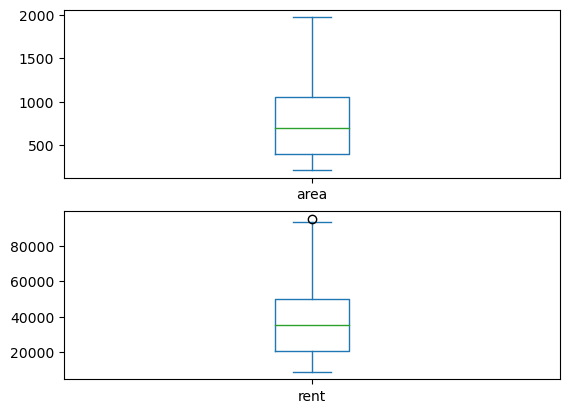

In [8]:
rent_df[['area','rent']].plot(kind='box',subplots=True,layout=(2,1))

In [9]:
q1,q3=np.percentile(rent_df['area'],[25,75])

In [10]:
print('25th Percentile : {}'.format(q1))
print('75th Percentile : {}'.format(q3))

25th Percentile : 400.0
75th Percentile : 1052.5


In [11]:
def get_outlier_range(df,col):
    q1,q3=np.percentile(df[col],[25,75])
    print('25th Percentile : {}'.format(q1))
    print('75th Percentile : {}'.format(q3))
    iqr=q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range,upper_range

In [12]:
lr,ur=get_outlier_range(rent_df,'area')
print('Lower Range : {} and Upper Range : {}'.format(lr,ur))

25th Percentile : 400.0
75th Percentile : 1052.5
Lower Range : -578.75 and Upper Range : 2031.25


In [13]:
rent_df.columns

Index(['area', 'bedrooms', 'furnished', 'rent'], dtype='object')

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

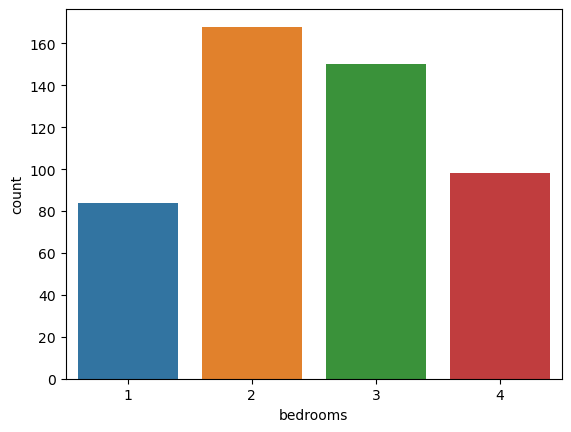

In [14]:
sns.countplot(rent_df['bedrooms'])

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='furnished', ylabel='count'>

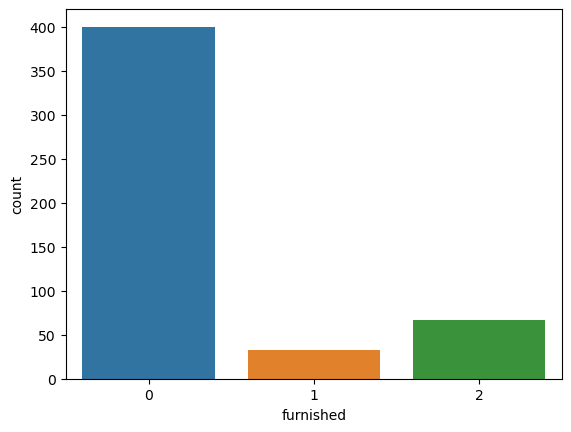

In [15]:
sns.countplot(rent_df['furnished'])

## Model Building
### Train Test Split

In [16]:
X=rent_df.drop(columns=['rent'])
y=pd.DataFrame({'rent':rent_df['rent']})

In [17]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [18]:
X.head(4)

,area,bedrooms,furnished
0,650,2,1
1,750,3,0
2,247,1,0
3,1256,4,0


In [19]:
y.head(4)

,rent
0,33000
1,55000
2,10500
3,65000


## LinearRegression

In [20]:
model=LinearRegression()

In [21]:
model.fit(X_train,y_train)

LinearRegression()

In [22]:
print('Coefficient : {}',model.coef_)
print('Intercepts : {}',model.intercept_)

Coefficient : {} [[  27.47818646 6103.32726175  840.41313154]]
Intercepts : {} [911.10583316]


In [23]:
prediction=model.predict(X_train)

In [24]:
train_pred=pd.DataFrame({'actual':y_train['rent'],'predicted':prediction[:,0]})

In [25]:
train_pred

,actual,predicted
14,16500,13801.545151
493,35200,33506.574712
56,39000,49776.830965
266,40000,48073.183405
179,13500,20399.479769
...,...,...
337,86000,79456.442212
91,43000,40104.509330
80,34000,31253.363422
191,46500,40516.682127


In [26]:
print ('R2 for training data: ', model.score (X_train, y_train))
print ('R2 for test data: ', model.score (X_test, y_test))

R2 for training data:  0.8840497413405322
R2 for test data:  0.8615809250320268


# Stochastic Gradient Descent

## SGDRegressor (Batch mode)
### Feature Scaling

In [30]:
X=rent_df.drop(columns=['rent'])
y=pd.DataFrame({'rent':rent_df['rent']})
scalar = StandardScaler()
scaled_df=scalar.fit_transform(X)
scaled_df=pd.DataFrame(scaled_df,columns=X.columns)
X=scaled_df

In [31]:
scaled_df.head(2)

,area,bedrooms,furnished
0,-0.314089,-0.530017,0.950998
1,-0.100765,0.481466,-0.476927


In [32]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
sgd_bm=SGDRegressor(average=True,shuffle=False,max_iter=100000)

In [33]:
sgd_bm.fit(X_train,y_train)

/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(average=True, max_iter=100000, shuffle=False)

In [34]:
print ('Intercept : ', sgd_bm.intercept_)
print ('Coef : ', sgd_bm.coef_)
print ('R2 for training data: ', sgd_bm.score (X_train, y_train))

Intercept :  [38502.14561139]
Coef :  [12874.34000136  6039.03782506   588.90718479]
R2 for training data:  0.8840497156928344


In [35]:
print ('Intercept : ', sgd_bm.intercept_)
print ('Coef : ', sgd_bm.coef_)
print ('R2 for training data: ', sgd_bm.score (X_test, y_test))

Intercept :  [38502.14561139]
Coef :  [12874.34000136  6039.03782506   588.90718479]
R2 for training data:  0.8615785842901442


## SGDRegressor (Stochastic mode)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
sgd_sm=SGDRegressor(shuffle=False,max_iter=100000)

In [37]:
sgd_sm.fit(X_train,y_train)

/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(max_iter=100000, shuffle=False)

In [38]:
print ('Intercept : ', sgd_sm.intercept_)
print ('Coef : ', sgd_sm.coef_)
print ('R2 for training data: ', sgd_sm.score (X_train, y_train))

Intercept :  [38509.7620646]
Coef :  [12888.25647214  6050.72424573   593.34157945]
R2 for training data:  0.8840481603220619


In [39]:
print ('Intercept : ', sgd_sm.intercept_)
print ('Coef : ', sgd_sm.coef_)
print ('R2 for training data: ', sgd_sm.score (X_test, y_test))

Intercept :  [38509.7620646]
Coef :  [12888.25647214  6050.72424573   593.34157945]
R2 for training data:  0.8615483185332521


## SGDRegressor (mini batch mode)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
sgd_mb=SGDRegressor(average=30,shuffle=False,max_iter=1000)

In [42]:
sgd_mb.fit(X_train,y_train)

/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(average=30, shuffle=False)

In [43]:
print ('Intercept : ', sgd_mb.intercept_)
print ('Coef : ', sgd_mb.coef_)
print ('R2 for training data: ', sgd_mb.score (X_train, y_train))

Intercept :  [38467.3089225]
Coef :  [12791.81870103  6114.75316483   588.92412907]
R2 for training data:  0.8840430304349306


In [44]:
print ('Intercept : ', sgd_mb.intercept_)
print ('Coef : ', sgd_mb.coef_)
print ('R2 for test data: ', sgd_mb.score (X_test, y_test))

Intercept :  [38467.3089225]
Coef :  [12791.81870103  6114.75316483   588.92412907]
R2 for test data:  0.8614349513575155


# Ridge

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
ridge = Ridge(alpha=1.0)

In [46]:
ridge.fit(X_train,y_train)

Ridge()

In [47]:
print ('Intercept : ', ridge.intercept_)
print ('Coef : ', ridge.coef_)
print ('R2 for training data: ', ridge.score (X_train, y_train))
print ('R2 for test data: ', ridge.score (X_test, y_test))

Intercept :  [38503.24782922]
Coef :  [[12774.94859399  6116.04983799   586.18245202]]
R2 for training data:  0.8840443047984459
R2 for test data:  0.8615725167137361


# Lasso

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
lasso = Lasso(alpha=0.1)

In [49]:
lasso.fit(X_train,y_train)


Lasso(alpha=0.1)

In [50]:
print ('Intercept : ', lasso.intercept_)
print ('Coef : ', lasso.coef_)
print ('R2 for training data: ', lasso.score (X_train, y_train))
print ('R2 for test data: ', lasso.score (X_test, y_test))

Intercept :  [38503.1984142]
Coef :  [12881.96290799  6033.06708096   588.45859451]
R2 for training data:  0.8840497408973376
R2 for test data:  0.8615813864074096


# HuberRegressor

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
huber = HuberRegressor()

In [52]:
huber.fit(X_train,y_train)

/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HuberRegressor()

In [53]:
print ('Intercept : ', huber.intercept_)
print ('Coef : ', huber.coef_)
print ('R2 for training data: ', huber.score (X_train, y_train))
print ('R2 for test data: ', huber.score (X_test, y_test))

Intercept :  38208.24254359434
Coef :  [13834.80878691  4919.06792305  1452.98530969]
R2 for training data:  0.8815342320586167
R2 for test data:  0.8598915223866515
